In [1]:
import os
import numpy as np 
from PIL import Image, ImageOps
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_set = 'train_data'
DEFAULT_SIZE = [250, 250]

def image_toarray(image_path = data_set, default_size= DEFAULT_SIZE):
    images = []
    image_names = []
    for person_name in os.listdir(data_set):
        person_folder = os.path.join(data_set, person_name)
        for img_name in os.listdir(person_folder):
            image_names.append(img_name)
            actualimage = Image.open(os.path.join(person_folder,img_name)) #assign image to actualimage
            actualimage = ImageOps.exif_transpose(actualimage)
            actualimage = actualimage.convert("L") #greyscale
            if (default_size is not None ):  #resize fucntion
                actualimage = actualimage.resize(default_size)
                plt.imshow(actualimage,cmap=plt.cm.gray)
                #plt.show()
            images.append(np.asarray (actualimage , dtype =np. uint8 ))
    print(len(images))
    return [images,image_names]
#image_toarray()

In [3]:
def as_col_matrix(X):    #assemble image to data matrix, each column is 1 image
    if len (X) == 0:
        return np. array ([])
    mat = np.empty((X[0].size , 0), dtype = X[0].dtype)
    for col in X:
        mat = np.hstack(( mat , np.asarray( col ).reshape(-1 , 1))) # R*C x 1 
    return mat
#[X, y] = image_toarray()  
#print(as_col_matrix(X).shape)


60


Text(0.5, 1.0, 'Mean Face')

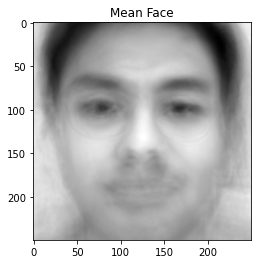

In [4]:
[X, y] = image_toarray()   
#print([X,y])
#print(image_toarray())
average_weight_matrix = np.reshape(as_col_matrix(X).mean(axis=1), DEFAULT_SIZE)
plt.style.use("dark_background")
plt.imshow(average_weight_matrix, cmap=plt.cm.gray)
plt.title("Mean Face")
#print(len(X))

def pca (X, y, num_components =0):
    [n,d] = X.shape #X is combined matrix of all images as rows, n = no. of faces
    if (num_components <= 0) or ( num_components >n):
        num_components = n
        mu = X.mean( axis =0)
        X = X - mu
    if n>d:
        C = np.dot(X.T,X) # Covariance Matrix
        [ eigenvalues , eigenvectors ] = np.linalg.eigh(C)
    else :
        C = np.dot (X,X.T) # Covariance Matrix
        [ eigenvalues , eigenvectors ] = np.linalg.eigh(C)
        eigenvectors = np.dot(X.T, eigenvectors )
        for i in range (n):
            eigenvectors [:,i] = eigenvectors [:,i]/ np.linalg.norm( eigenvectors [:,i])
    # sort eigenvectors descending by their eigenvalue
    idx = np.argsort (- eigenvalues )
    eigenvalues = eigenvalues [idx ]
    eigenvectors = eigenvectors [:, idx ]
    num_components = get_number_of_components_to_preserve_variance(eigenvalues)
    # select only num_components
    eigenvalues = eigenvalues [0: num_components ].copy ()
    eigenvectors = eigenvectors [: ,0: num_components ].copy ()
    return [ eigenvalues , eigenvectors , mu]  

[eigenvalues, eigenvectors, mean] = pca (as_row_matrix(X), y)

In [5]:
def numofprincipalcomponents(eigenvalues, variance=.95):
    for numofcomp, eigen_value_cumsum in enumerate(np.cumsum(eigenvalues) / np.sum(eigenvalues)):
        if eigen_value_cumsum > variance:
            return numofcomp

def pca(X):
    [rows, images] = X.shape
    num_components = rows
    mu = X.mean( axis=1, keepdims=True)
    X = X - mu
    if rows<images:
        C = np.matmul(X,X.T)                  #this to get smaller dimension C is covarience matrix
        [eigenvalues , eigenvectors] = np.linalg.eigh(C)
    
    else:
        C = np.matmul(X.T,X)
        [eigenvalues , eigenvectors] = np.linalg.eigh(C)
        eigenvectors = np.matmul(X, eigenvectors)
        
    # sort eigenvectors descending by their eigenvalue
    dxvalues = np.argsort (- eigenvalues ) #Get order of index of highest - lowest eigenvalue as dxvalues
    eigenvalues = eigenvalues [dxvalues] #Sort eigenvalues by highest - lowest using index dxvalues
    eigenvectors = eigenvectors [:, dxvalues] #Do the same for eigenvectors
    pcomponents = numofprincipalcomponents(eigenvalues)
    eigenvalues = eigenvalues [0 : pcomponents].copy ()
    eigenvectors = eigenvectors [: ,0 : pcomponents].copy ()
    
    print("No. of PC: %d" % pcomponents)
    print("No. of eigenvalues: %d" % eigenvalues.shape)
    print("Row x Col of eigenvectors: %d %d" %eigenvectors.shape)
    #mu = mu.tolist()
    print(mu.shape)
    X=X.T
    print(X.shape)
    return  [eigenvalues , eigenvectors , mu]  

[eigenvalues, eigenvectors, mean] = pca(as_col_matrix(X))
   

No. of PC: 27
No. of eigenvalues: 27
Row x Col of eigenvectors: 62500 27
(62500, 1)
(60, 62500)


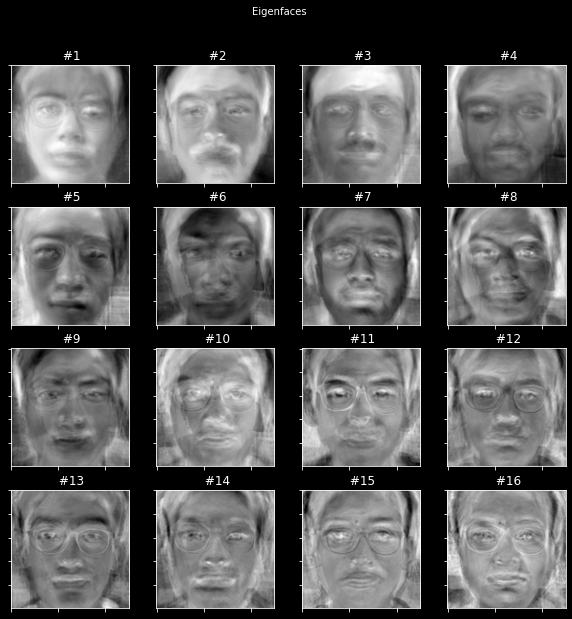

In [6]:
def subplot ( title , images , rows , cols , sptitle ="", sptitles =[] , colormap = plt.cm.gray, filename = None, figsize = (10, 10) ):
    fig = plt.figure(figsize = figsize)
    # main title
    fig.text (.5 , .95 , title , horizontalalignment ="center")
    for i in range ( len ( images )):
        ax0 = fig.add_subplot( rows , cols ,( i +1))
        plt.setp ( ax0.get_xticklabels() , visible = False )
        plt.setp ( ax0.get_yticklabels() , visible = False )
        if len ( sptitles ) == len ( images ):
            plt.title("%s #%s" % ( sptitle , str ( sptitles [i ]) )  )
        else:
            plt.title("%s #%d" % ( sptitle , (i +1) )  )
        plt.imshow(np.asarray(images[i]) , cmap = colormap )
    if filename is None :
        plt.show()
    else:
        fig.savefig( filename )

        
E = []
number = eigenvectors.shape[1]
for i in range (min(number, 16)):
    e = eigenvectors[:,i].reshape(DEFAULT_SIZE)
    E.append(np.asarray(e))
# plot them and store the plot to " python_eigenfaces .pdf"
plt.style.use("dark_background")
subplot ( title ="Eigenfaces", images=E, rows =4, cols =4, colormap =plt.cm.gray , filename ="python_pca_eigenfaces.png")

(62500, 1)
(62500, 27)
(62500, 1)


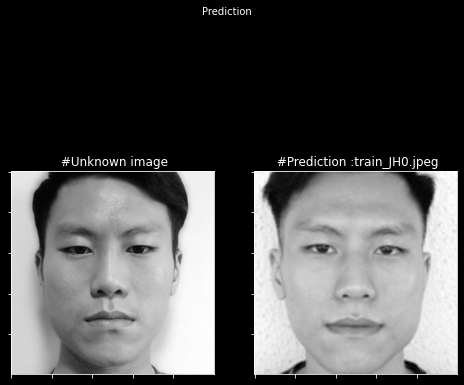

In [7]:
def project (W , X , mu):
    return np.matmul(W.T , X-mu)

def dist_metric(p,q): #Function for basic calculations of euclidean distance
    p = np.asarray(p).flatten()
    q = np.asarray (q).flatten()
    return np.sqrt (np.sum (np. power ((p-q) ,2)))

def predict (W, mu , projections, y, X): #
    minDist = float("inf")
    minClass = -1
    Q = project (W, X.reshape (-1 , 1) , mu)
    for i in range (len(projections)):           #This part sorts thru dist array and find mindist
        dist = dist_metric( projections[i], Q)
        if dist < minDist:
            minDist = dist
            minClass = i
    return minClass
print(mean.shape)
print(eigenvectors.shape)
print((X[0].reshape(-1,1) - mean).shape)

projections = []
for xi in X:
    projections.append(project(eigenvectors, xi.reshape(-1, 1) , mean))


image = Image.open(r"junhantest01.jpg")
image = ImageOps.exif_transpose(image)
image = image.convert ("L")
if (DEFAULT_SIZE is not None ):
    image = image.resize (DEFAULT_SIZE , Image.ANTIALIAS )
test_image = np. asarray (image , dtype =np. uint8 )
predicted = predict(eigenvectors, mean , projections, y, test_image)
plt.style.use("dark_background")
subplot ( title ="Prediction", images =[test_image, X[predicted]], rows =1, cols =2, 
         sptitles = ["Unknown image", "Prediction :{0}".format(y[predicted])] , colormap =plt.cm.gray , 
         filename ="prediction_test.png", figsize = (8,8))

(62500, 1)
(62500, 27)
(62500, 1)
Distance: [139216213.52654964, 40534093.24610815, 76471077.61035837, 53732750.27512449, 131485798.16265951, 29551615.6534661, 21689475.172662348, 62448336.938506015, 53122853.99237879, 45295680.8118012, 178278268.34434834, 139226827.48730946, 23035484.30937937, 251759158.99952602, 39323553.29176823, 260828850.97156593, 19445876.83737811, 33657592.00907184, 51284345.193376414, 85580367.52008682, 64279776.466420814, 138571852.212155, 42857708.52564952, 22765553.039329685]
24


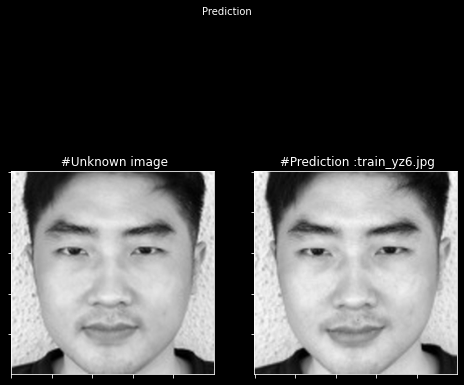

In [23]:
distcalc = 'maxdistcalc'

def project (W , X , mu):
    return np.matmul(W.T , X-mu)

def dist_metric(p,q): #Function for basic calculations of euclidean distance
    p = np.asarray(p).flatten()
    q = np.asarray (q).flatten()
    return np.sqrt (np.sum (np. power ((p-q) ,2)))

alldist = []
def predict (W, mu , projections, y, X): #
    minDist = float("inf")
    minClass = -1
    Q = project (W, X.reshape (-1 , 1) , mu)
    for i in range (len(projections)):           #This part sorts thru dist array and find mindist
        dist = dist_metric( projections[i], Q)
        if dist < minDist:
            minDist = dist
            minClass = i
    alldist.append(minDist)
    return minClass
print(mean.shape)
print(eigenvectors.shape)
print((X[0].reshape(-1,1) - mean).shape)

projections = []
for xi in X:
    projections.append(project(eigenvectors, xi.reshape(-1, 1) , mean))

for img_name in os.listdir(distcalc):
    image = Image.open(os.path.join(distcalc,img_name))
    image = ImageOps.exif_transpose(image)
    image = image.convert ("L")
    if (DEFAULT_SIZE is not None ):
        image = image.resize (DEFAULT_SIZE , Image.ANTIALIAS )
        test_image = np. asarray (image , dtype =np. uint8 )
        predicted = predict(eigenvectors, mean , projections, y, test_image)
        plt.style.use("dark_background")
subplot ( title ="Prediction", images =[test_image, X[predicted]], rows =1, cols =2, 
         sptitles = ["Unknown image", "Prediction :{0}".format(y[predicted])] , colormap =plt.cm.gray , 
         filename ="prediction_test.png", figsize = (8,8))
print('Distance:',alldist)
print(len(alldist))

In [24]:
print(np.max(alldist))

260828850.97156593
